In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import date

os.chdir("../")
base_path = os.getcwd()

from machine_learning.mlMethods import *
from machine_learning.machine_learning_ocorrencia_doenca import *
from machine_learning.measuringResults import *
from machine_learning.preProcessing import *
from machine_learning.visualization import *

In [15]:
df_dengue_militar = pd.read_csv(base_path + "/data_sus/finais/dengue_input_militar_from_source.csv")
df_dengue_copacabana = pd.read_csv(base_path + "/data_sus/finais/dengue_input_copacabana_from_source.csv")
df_dengue_antigo = read_and_get_input_v2(base_path+ \
                                     '/data_sus/finais/input_ml_ocorrencia_doencas_v6.csv')

## 1. Comparação de Ocorrência de Casos de Dengue base do DataRio e do DataSUS

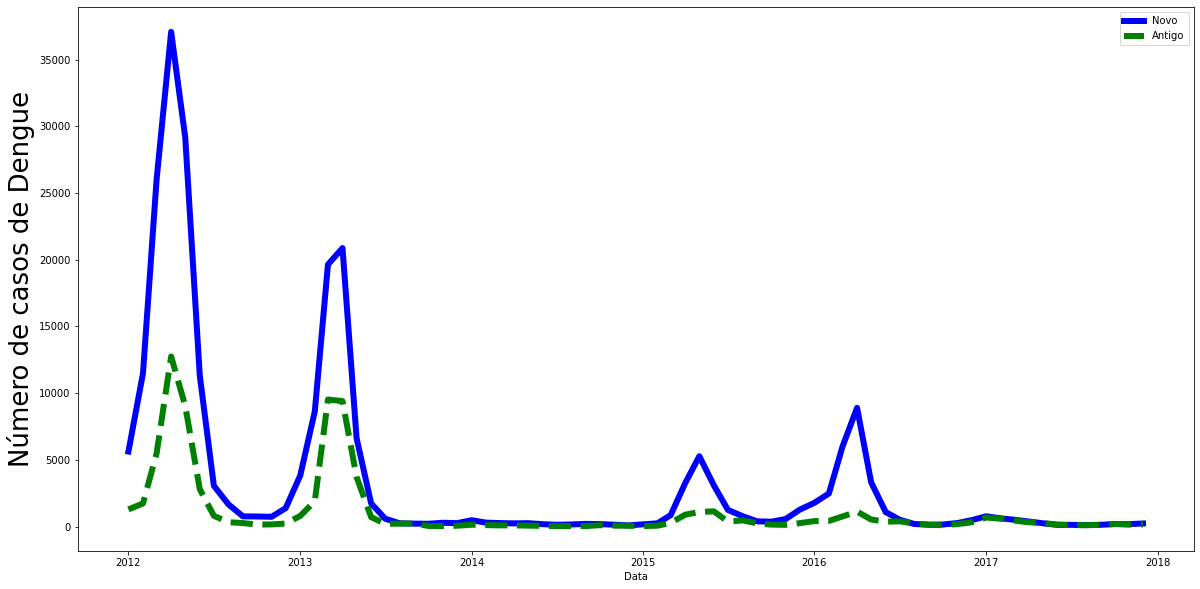

In [8]:
df_dengue_antigo = df_dengue_antigo[df_dengue_antigo["ano"].isin(list(df_dengue_militar["ano"].unique()))]

df_from_source = df_dengue_militar.pivot_table(index=["ano", "mes"], values=["dengue_diagnosis"], aggfunc="sum")
df_antiga = df_dengue_antigo.pivot_table(index=["ano", "mes"], values=["dengue_diagnosis"], aggfunc="sum")

df_from_source = df_from_source.reset_index()
df_from_source["data"] = df_from_source[["ano", "mes"]].apply(lambda x: date(x[0], x[1], 1), axis=1)
df_from_source = df_from_source[df_from_source["ano"] < 2018]

plot_two_lines_v2(list(df_from_source['dengue_diagnosis']), list(df_antiga['dengue_diagnosis']),
               list(df_from_source["data"]))

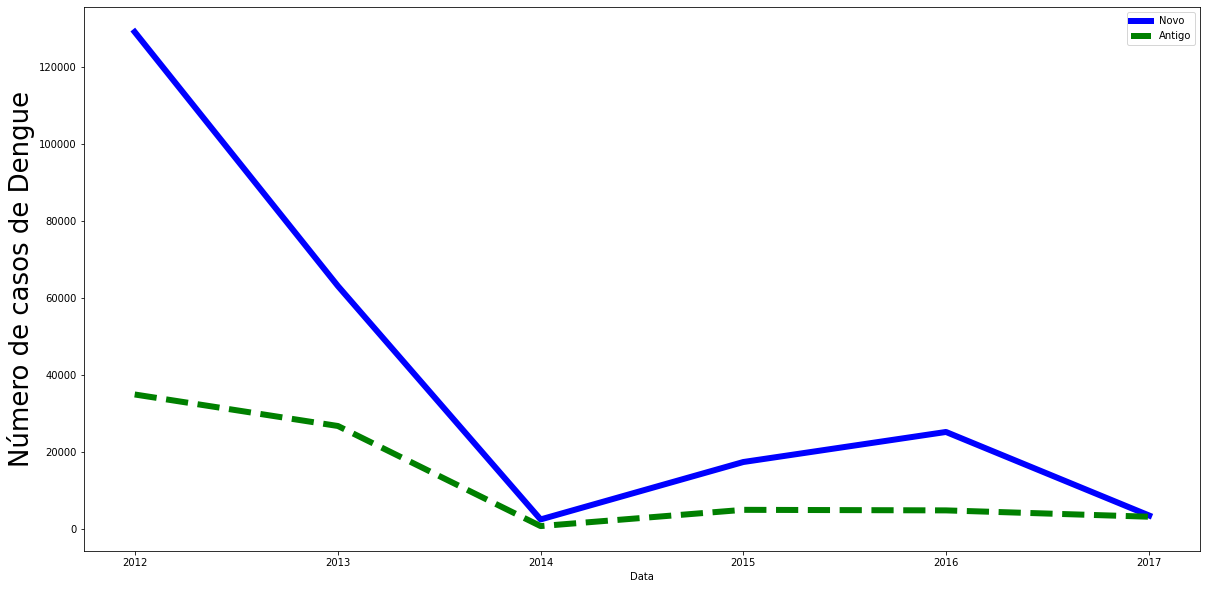

In [9]:
df_from_source = df_dengue_militar.pivot_table(index=["ano"], values=["dengue_diagnosis"], aggfunc="sum")
df_antiga = df_dengue_antigo.pivot_table(index=["ano"], values=["dengue_diagnosis"], aggfunc="sum")

df_from_source = df_from_source.reset_index()
df_from_source["data"] = df_from_source[["ano"]].apply(lambda x: date(x[0], 1, 1), axis=1)
df_from_source = df_from_source[df_from_source["ano"] < 2018]

plot_two_lines_v2(list(df_from_source['dengue_diagnosis']), list(df_antiga['dengue_diagnosis']),
               list(df_from_source["data"]))

##  2. Comparação de Temperatura

### 2.1 Militar vs Antigo

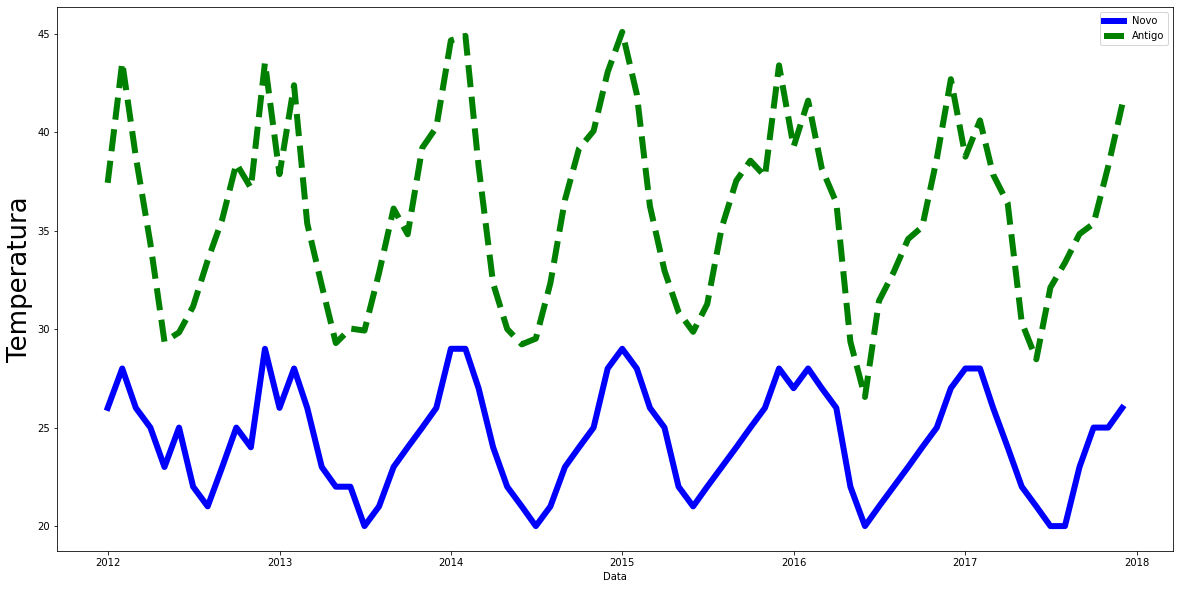

In [10]:
df_from_source = df_dengue_militar.pivot_table(index=["ano", "mes"], values=['temperatura (°C)'], aggfunc="mean")
df_antiga = df_dengue_antigo.pivot_table(index=["ano", "mes"], values=['temp_solo'], aggfunc="mean")

df_from_source = df_from_source.reset_index()
df_from_source["data"] = df_from_source[["ano", "mes"]].apply(lambda x: date(x[0], x[1], 1), axis=1)
df_from_source = df_from_source[df_from_source["ano"] < 2018]

plot_two_lines_v2(list(df_from_source['temperatura (°C)']), list(df_antiga['temp_solo']),
               list(df_from_source["data"]), ylabel="Temperatura")

### 2.2 Copacabana vs Antigo

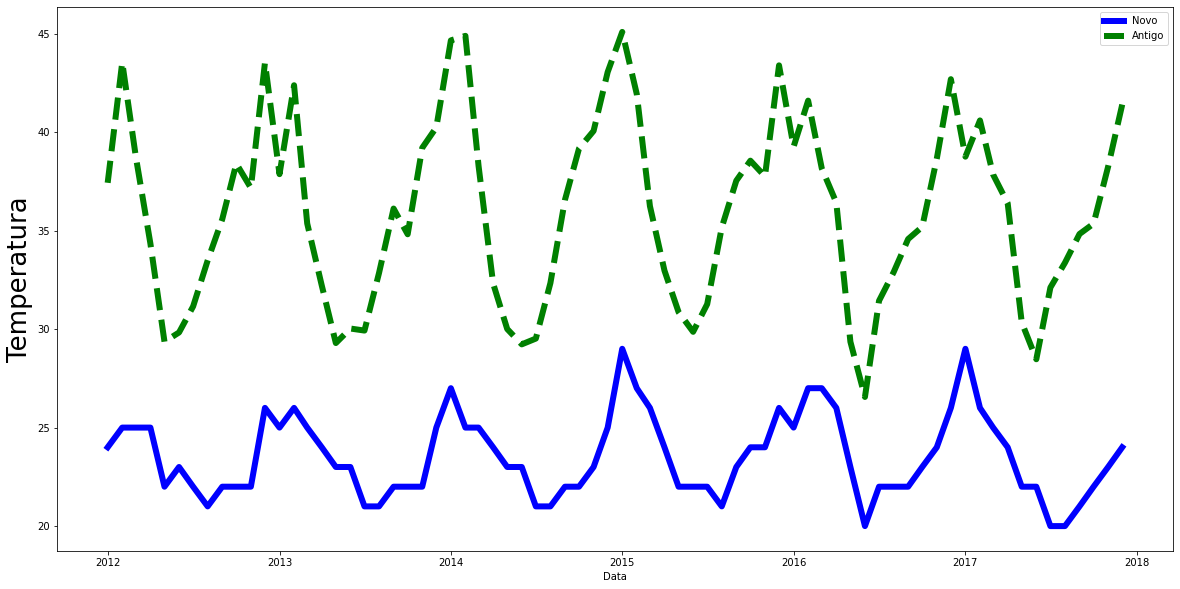

In [11]:
df_from_source = df_dengue_copacabana.pivot_table(index=["ano", "mes"], values=['temperatura (°C)'], aggfunc="mean")
df_antiga = df_dengue_antigo.pivot_table(index=["ano", "mes"], values=['temp_solo'], aggfunc="mean")

df_from_source = df_from_source.reset_index()
df_from_source["data"] = df_from_source[["ano", "mes"]].apply(lambda x: date(x[0], x[1], 1), axis=1)
df_from_source = df_from_source[df_from_source["ano"] < 2018]

plot_two_lines_v2(list(df_from_source['temperatura (°C)']), list(df_antiga['temp_solo']),
               list(df_from_source["data"]), ylabel="Temperatura")

### 2.3 Militar vs Copacabana

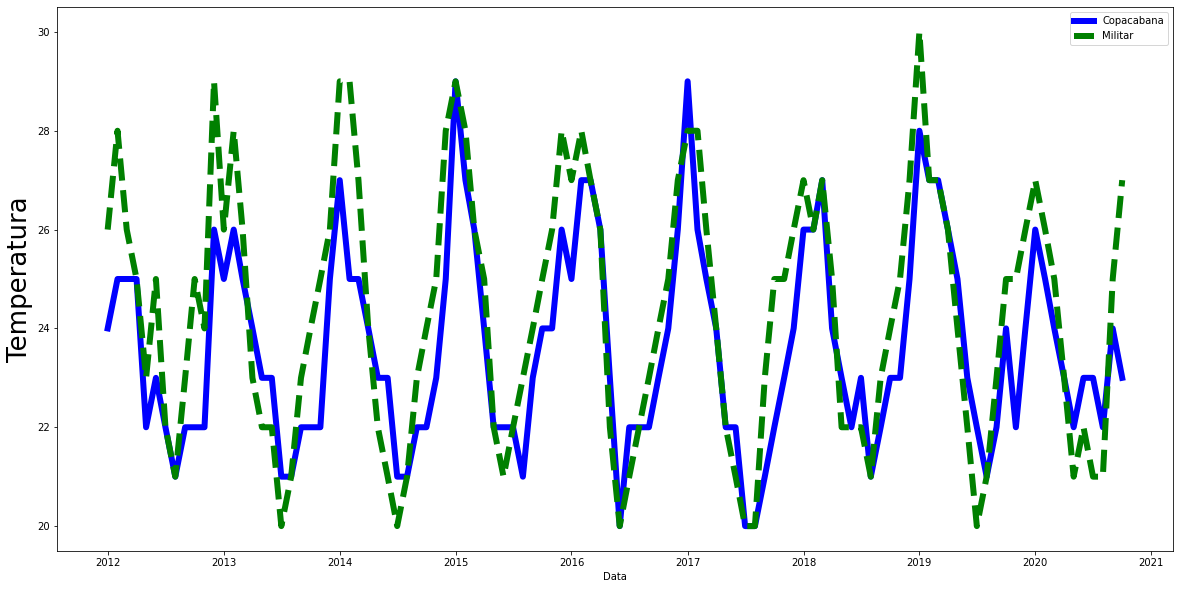

In [17]:
df_from_source = df_dengue_copacabana.pivot_table(index=["ano", "mes"], 
                                                  values=['temperatura (°C)'], aggfunc="mean")
df_antiga = df_dengue_militar.pivot_table(index=["ano", "mes"], values=['temperatura (°C)'], aggfunc="mean")

df_from_source = df_from_source.reset_index()
df_from_source["data"] = df_from_source[["ano", "mes"]].apply(lambda x: date(x[0], x[1], 1), axis=1)

plot_two_lines_v2(list(df_from_source['temperatura (°C)']), list(df_antiga['temperatura (°C)']),
               list(df_from_source["data"]), ylabel="Temperatura", 
                  labelList1="Copacabana", labelList2="Militar")

## 3. Comparação Umidade

### 3.1 Militar vs Copacabana

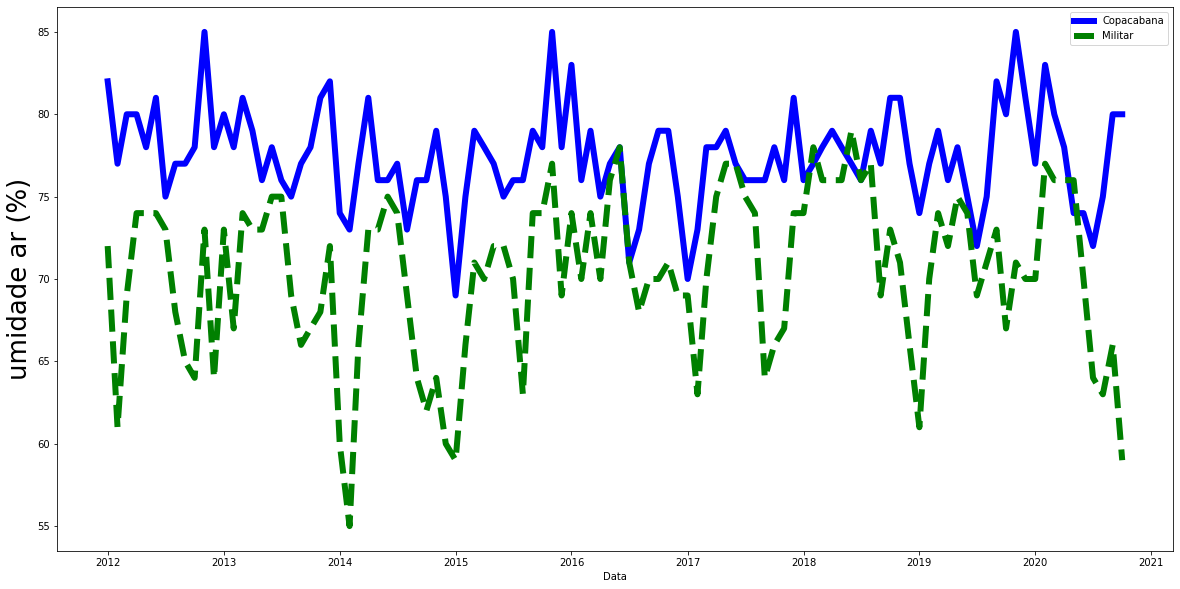

In [19]:
df_from_source = df_dengue_copacabana.pivot_table(index=["ano", "mes"], 
                                                  values=['umidade ar (%)'], aggfunc="mean")
df_antiga = df_dengue_militar.pivot_table(index=["ano", "mes"], values=['umidade ar (%)'], aggfunc="mean")

df_from_source = df_from_source.reset_index()
df_from_source["data"] = df_from_source[["ano", "mes"]].apply(lambda x: date(x[0], x[1], 1), axis=1)

plot_two_lines_v2(list(df_from_source['umidade ar (%)']), list(df_antiga['umidade ar (%)']),
               list(df_from_source["data"]), ylabel='umidade ar (%)', 
                  labelList1="Copacabana", labelList2="Militar")

## 4. Comparação Precipitação

### 4.1 Copacabana vs Militar

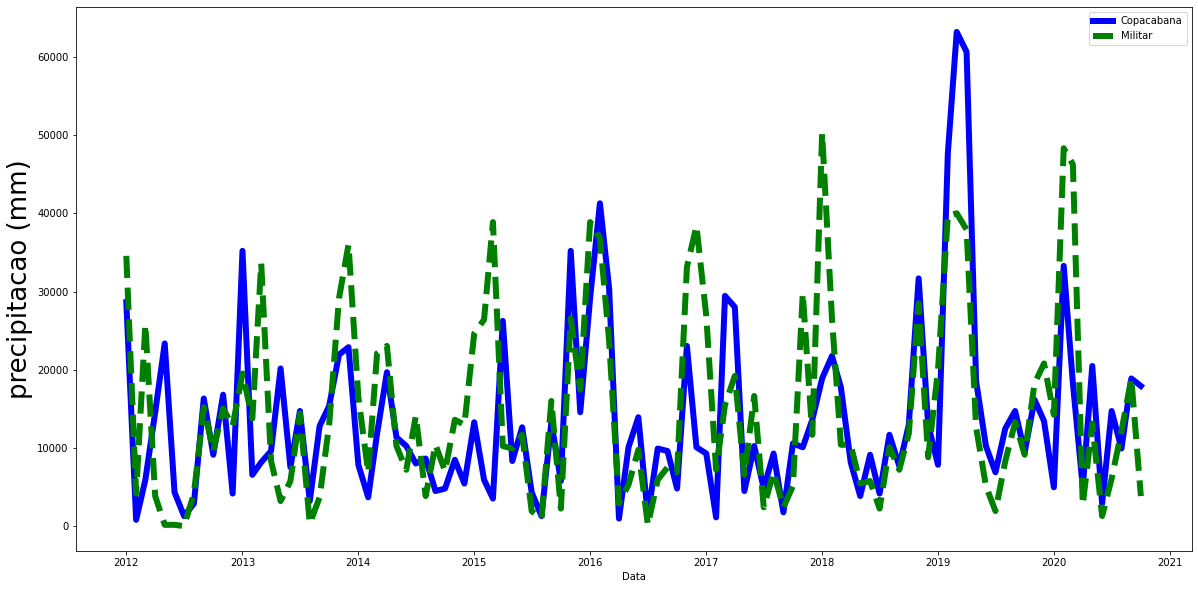

In [21]:
df_from_source = df_dengue_copacabana.pivot_table(index=["ano", "mes"], 
                                                  values=['precipitacao (mm)'], aggfunc="sum")
df_antiga = df_dengue_militar.pivot_table(index=["ano", "mes"], values=['precipitacao (mm)'], aggfunc="sum")

df_from_source = df_from_source.reset_index()
df_from_source["data"] = df_from_source[["ano", "mes"]].apply(lambda x: date(x[0], x[1], 1), axis=1)

plot_two_lines_v2(list(df_from_source['precipitacao (mm)']), list(df_antiga['precipitacao (mm)']),
               list(df_from_source["data"]), ylabel='precipitacao (mm)', 
                  labelList1="Copacabana", labelList2="Militar")